In [46]:
from google.colab import files
uploaded = files.upload()

Saving StudentsPerformance.csv to StudentsPerformance.csv


In [47]:
!pip install matplotlib seaborn scikit-learn pandas

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [49]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [50]:
# Encode categorical variables
le = LabelEncoder()
for col in ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']:
    df[col] = le.fit_transform(df[col])

# Calculate average score
df['average'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

# Grade label
def get_grade(avg):
    if avg >= 90: return 'A'
    elif avg >= 75: return 'B'
    elif avg >= 60: return 'C'
    elif avg >= 40: return 'D'
    else: return 'F'

df['grade'] = df['average'].apply(get_grade)
df[['average', 'grade']].head()


,average,grade
0,72.666667,C
1,82.333333,B
2,92.666667,A
3,49.333333,D
4,76.333333,B


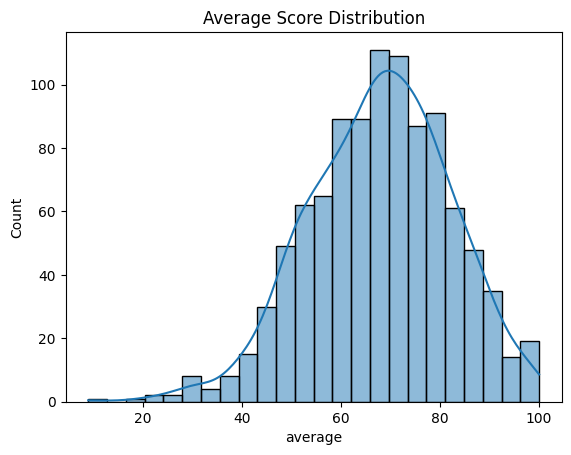

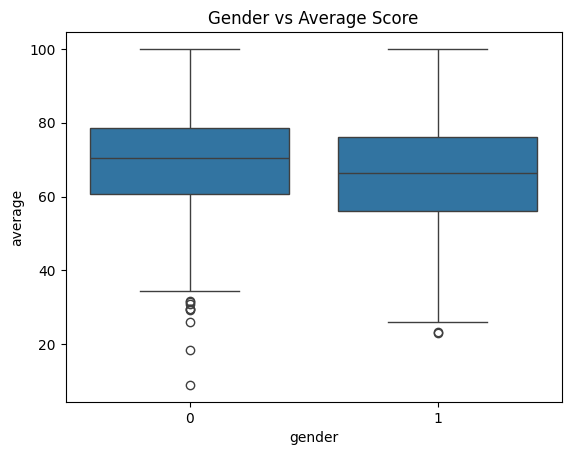

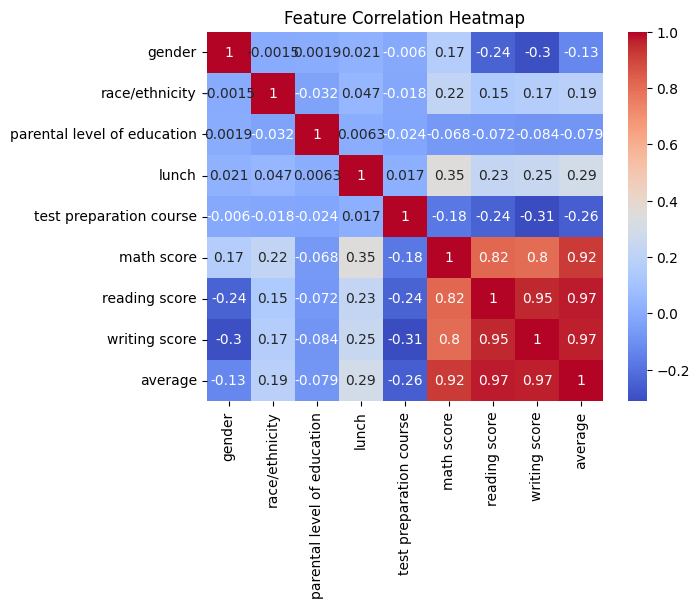

In [52]:
# Histogram of average scores
sns.histplot(df['average'], kde=True)
plt.title("Average Score Distribution")
plt.show()

# Gender vs average
sns.boxplot(x='gender', y='average', data=df)
plt.title("Gender vs Average Score")
plt.show()

# Heatmap
sns.heatmap(df.drop('grade', axis=1).corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [53]:
X = df.drop(['grade'], axis=1)
y = df['grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [54]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "Gradient Boosting": GradientBoostingClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"{name} Accuracy: {acc:.2f}")


Random Forest Accuracy: 1.00


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.81
Decision Tree Accuracy: 1.00
SVM Accuracy: 0.96
Gradient Boosting Accuracy: 1.00


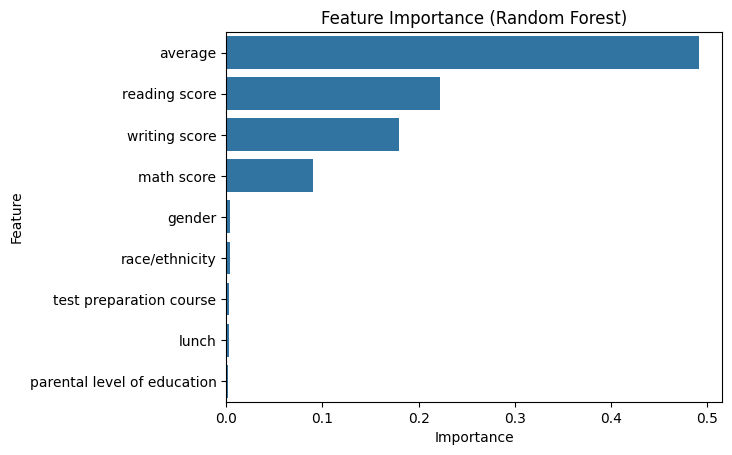

In [55]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

importances = rf.feature_importances_
feat_names = X.columns
feat_df = pd.DataFrame({"Feature": feat_names, "Importance": importances}).sort_values(by="Importance", ascending=False)

sns.barplot(x="Importance", y="Feature", data=feat_df)
plt.title("Feature Importance (Random Forest)")
plt.show()


In [56]:
sample = X_test.iloc[0]
actual = y_test.iloc[0]
pred = rf.predict([sample])

print("Sample Features:")
print(sample)
print("Actual Grade:", actual)
print("Predicted Grade:", pred[0])


Sample Features:
gender                          0.0
race/ethnicity                  2.0
parental level of education     0.0
lunch                           1.0
test preparation course         1.0
math score                     91.0
reading score                  86.0
writing score                  84.0
average                        87.0
Name: 521, dtype: float64
Actual Grade: B
Predicted Grade: B


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
